In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

Зчитуємо дані для train та test

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data_test = pd.read_csv("D:/application_test.csv")
data_train = pd.read_csv("D:/application_train.csv")
data = data_train.append(data_test)

Розмір train- та test- датасетів

In [3]:
print("Test size: ", data_test.shape)
print("Train size: ", data_train.shape)

Test size:  (48744, 121)
Train size:  (307511, 122)


Приклад train-датасету

In [4]:
data_train.sample(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
17296,120172,0,Cash loans,F,N,N,0,135000.0,941193.0,37458.0,760500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-13477,-1313,-3722.0,-4788,NaN,1,1,0,1,0,0,Sales staff,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Self-employed,0.648241,0.704306,0.733815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,-1544.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
253241,393038,0,Cash loans,M,Y,Y,0,157500.0,592560.0,31153.5,450000.0,Unaccompanied,Working,Incomplete higher,Single / not married,House / apartment,0.018850,-10780,-1685,-4352.0,-3115,18.0,1,1,0,1,0,0,Core staff,1.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,NaN,0.473834,0.533482,0.1866,0.1562,0.9891,NaN,NaN,0.24,0.2069,0.3333,NaN,0.0763,NaN,0.1987,NaN,0.2202,0.1901,0.1621,0.9891,NaN,NaN,0.2417,0.2069,0.3333,NaN,0.0781,NaN,0.2070,NaN,0.2332,0.1884,0.1562,0.9891,NaN,NaN,0.24,0.2069,0.3333,NaN,0.0777,NaN,0.2023,NaN,0.2249,NaN,block of flats,0.2310,"Stone, brick",No,3.0,0.0,3.0,0.0,-968.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
51696,159862,0,Cash loans,M,N,N,0,135000.0,473760.0,50269.5,450000.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.015221,-16330,-3134,-1428.0,-5079,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.333372,0.584436,0.738020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
265473,

Наявні у train-датасеті типи даних

In [5]:
data_train.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


Наявні у test-датасеті типи даних

In [6]:
data_test.dtypes

SK_ID_CURR                        int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


Відсутні дані у відсотковому співвідношенні

In [7]:
data.isnull().sum().sort_values(ascending=False)/len(data)*100

COMMONAREA_AVG                  69.714109
COMMONAREA_MODE                 69.714109
COMMONAREA_MEDI                 69.714109
NONLIVINGAPARTMENTS_AVG         69.293343
NONLIVINGAPARTMENTS_MEDI        69.293343
NONLIVINGAPARTMENTS_MODE        69.293343
FONDKAPREMONT_MODE              68.235393
LIVINGAPARTMENTS_MODE           68.203674
LIVINGAPARTMENTS_MEDI           68.203674
LIVINGAPARTMENTS_AVG            68.203674
FLOORSMIN_MEDI                  67.678489
FLOORSMIN_AVG                   67.678489
FLOORSMIN_MODE                  67.678489
YEARS_BUILD_MODE                66.330578
YEARS_BUILD_AVG                 66.330578
YEARS_BUILD_MEDI                66.330578
OWN_CAR_AGE                     66.031635
LANDAREA_MODE                   59.183450
LANDAREA_AVG                    59.183450
LANDAREA_MEDI                   59.183450
BASEMENTAREA_MODE               58.268375
BASEMENTAREA_MEDI               58.268375
BASEMENTAREA_AVG                58.268375
NONLIVINGAREA_AVG               54

Зв'язок даних з колонкою Target

In [9]:
correlations = data.corr()['TARGET'].sort_values()
correlations

EXT_SOURCE_3                   -0.178919
EXT_SOURCE_2                   -0.160472
EXT_SOURCE_1                   -0.155317
DAYS_EMPLOYED                  -0.044932
FLOORSMAX_AVG                  -0.044003
FLOORSMAX_MEDI                 -0.043768
FLOORSMAX_MODE                 -0.043226
AMT_GOODS_PRICE                -0.039645
REGION_POPULATION_RELATIVE     -0.037227
ELEVATORS_AVG                  -0.034199
ELEVATORS_MEDI                 -0.033863
FLOORSMIN_AVG                  -0.033614
FLOORSMIN_MEDI                 -0.033394
LIVINGAREA_AVG                 -0.032997
LIVINGAREA_MEDI                -0.032739
FLOORSMIN_MODE                 -0.032698
TOTALAREA_MODE                 -0.032596
ELEVATORS_MODE                 -0.032131
LIVINGAREA_MODE                -0.030685
AMT_CREDIT                     -0.030369
APARTMENTS_AVG                 -0.029498
APARTMENTS_MEDI                -0.029184
FLAG_DOCUMENT_6                -0.028602
APARTMENTS_MODE                -0.027284
LIVINGAPARTMENTS

Перевірка на дублікати

In [10]:
data[data.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


Опис

In [11]:
data_train.describe(include="all")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Унікальні категоріальні класи

In [12]:
data.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Обираємо дані для класифікації

In [14]:
numerical_features = ["CNT_CHILDREN",
                      "AMT_INCOME_TOTAL",
                      "AMT_CREDIT",
                      "AMT_GOODS_PRICE",
                      "DAYS_BIRTH",
                      "DAYS_EMPLOYED",
]
categorical_features = ["CODE_GENDER",
                         "FLAG_OWN_CAR",
                         "FLAG_OWN_REALTY",
                         "NAME_INCOME_TYPE"
                         "NAME_EDUCATION_TYPE",
    
]

Шукаємо Outliers

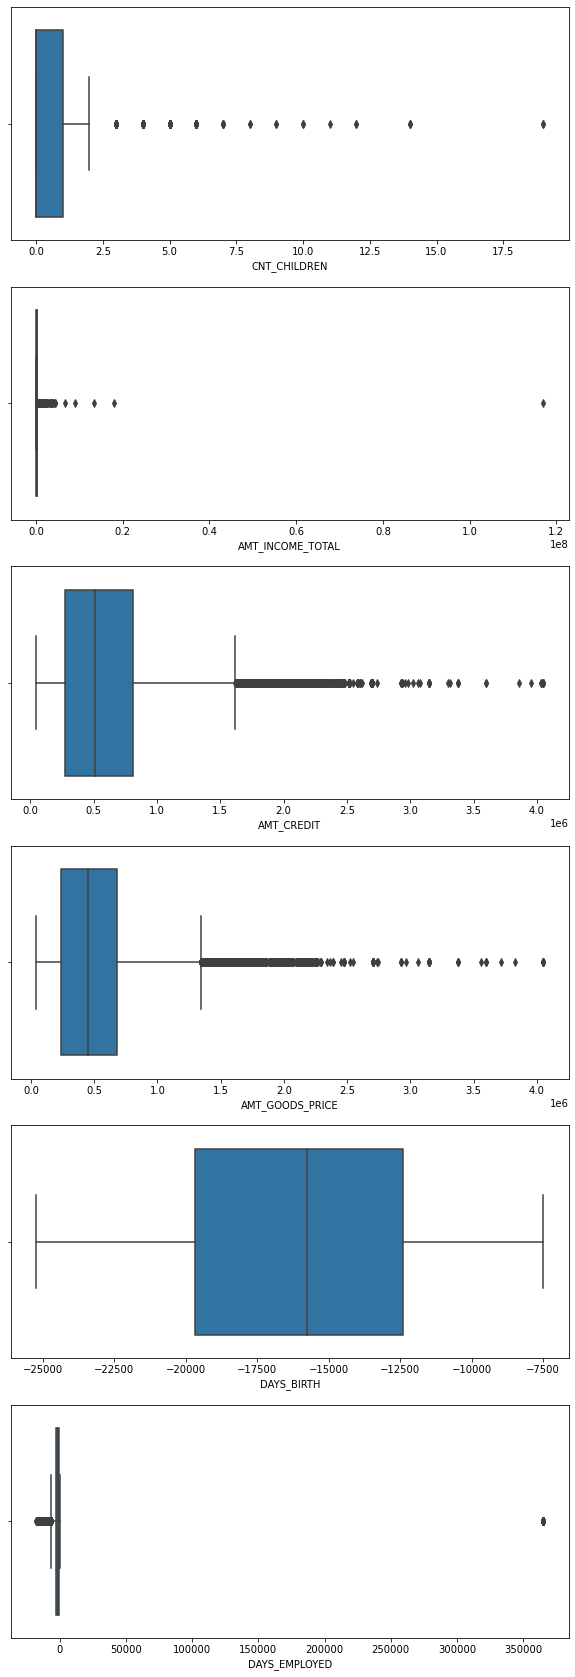

In [15]:
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1)
fig.set_size_inches(10,30)
for i, col in enumerate(numerical_features):
    sns.boxplot(x=data_train[col], ax=axes[i])
plt.show()

In [17]:
# про всяк випадок зчитаємо дані ще раз
data_test = pd.read_csv("D:/application_test.csv")
data_train = pd.read_csv("D:/application_train.csv")

features = ["TARGET",
            "CODE_GENDER",
            "NAME_CONTRACT_TYPE",
            "FLAG_OWN_CAR",
            "CNT_CHILDREN",
            "FLAG_OWN_REALTY", 
            "AMT_INCOME_TOTAL", 
            "AMT_CREDIT", 
            "DAYS_EMPLOYED",
            "DAYS_BIRTH",
            "NAME_EDUCATION_TYPE",
            "NAME_INCOME_TYPE",
            "AMT_GOODS_PRICE"
 ]

selected_train_data = data_train[features]
features.remove("TARGET")
selected_test_data = data_test[features]

Перевіримо типи

In [18]:
selected_train_data.select_dtypes(include=["int64","float64"]).median()

TARGET                   0.0
CNT_CHILDREN             0.0
AMT_INCOME_TOTAL    147150.0
AMT_CREDIT          513531.0
DAYS_EMPLOYED        -1213.0
DAYS_BIRTH          -15750.0
AMT_GOODS_PRICE     450000.0
dtype: float64

Зробимо дату народження додатньою

In [19]:
selected_train_data['DAYS_BIRTH'] = abs(data_train['DAYS_BIRTH'])
selected_test_data['DAYS_BIRTH'] = abs(data_test['DAYS_BIRTH'])

Знаходимо відсутні дані серед обраних колонок

In [20]:
selected_train_data.isnull().sum().sort_values(ascending=False)

AMT_GOODS_PRICE        278
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
DAYS_BIRTH               0
DAYS_EMPLOYED            0
AMT_CREDIT               0
AMT_INCOME_TOTAL         0
FLAG_OWN_REALTY          0
CNT_CHILDREN             0
FLAG_OWN_CAR             0
NAME_CONTRACT_TYPE       0
CODE_GENDER              0
TARGET                   0
dtype: int64

Заповнюємо відсутні дані середніми значеннями

In [21]:
selected_train_data[['AMT_GOODS_PRICE']]=selected_train_data[['AMT_GOODS_PRICE']].fillna(value=selected_train_data[['AMT_GOODS_PRICE']].mean())

Перевіримо деякі критерії

<AxesSubplot:xlabel='FLAG_OWN_CAR', ylabel='Count'>

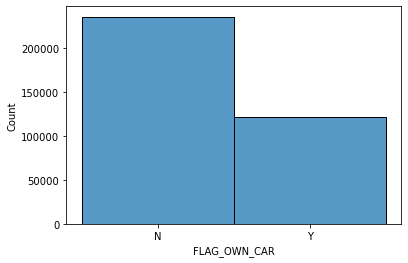

In [22]:
sns.histplot(data['FLAG_OWN_CAR'])

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='Count'>

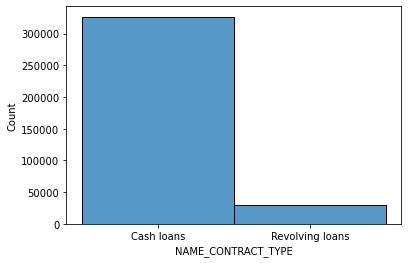

In [23]:
sns.histplot(data['NAME_CONTRACT_TYPE'])

array([[<AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>],
       [<AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>],
       [<AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

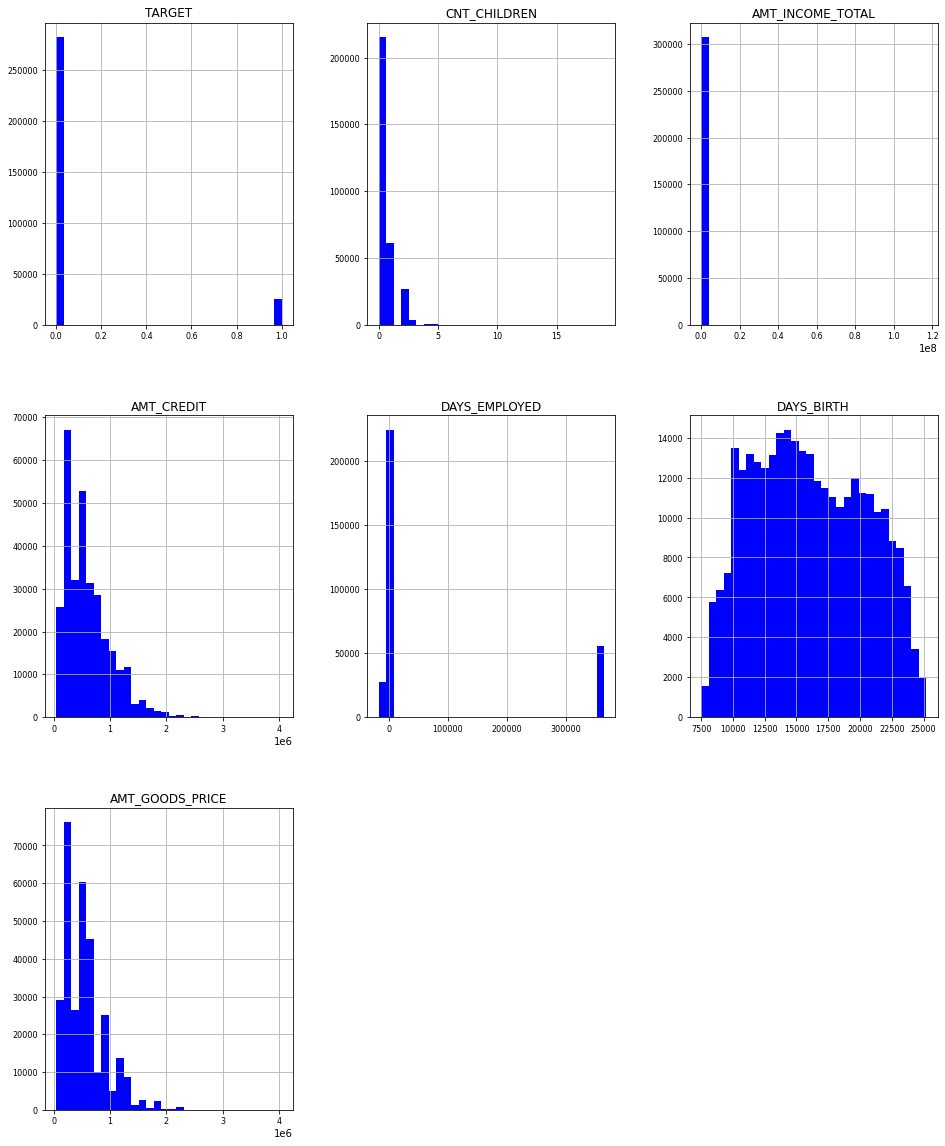

In [24]:
selected_train_data.hist(figsize=(16, 20), color = 'b', bins=30, xlabelsize=8, ylabelsize=8)

Decision Tree - призвело до overfitting

In [25]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

data_train = pd.read_csv('D:/application_train.csv',delimiter=",", header=0)
data_test=pd.read_csv('D:/application_test.csv',delimiter=",", header=0)

feat=["TARGET",
      "CODE_GENDER",
      "NAME_CONTRACT_TYPE",
      "FLAG_OWN_CAR",
      "CNT_CHILDREN",
      "FLAG_OWN_REALTY", 
      "AMT_INCOME_TOTAL", 
      "AMT_CREDIT", 
      "DAYS_EMPLOYED",
      "DAYS_BIRTH",
      "NAME_EDUCATION_TYPE",
      "NAME_INCOME_TYPE",
      "AMT_GOODS_PRICE"
    ]
train_data=data_train[feat]
feat.remove("TARGET")
test_data=data_test[feat]
train_data[['AMT_GOODS_PRICE']]=train_data[['AMT_GOODS_PRICE']].fillna(value=train_data[['AMT_GOODS_PRICE']].mean())

train_data['DAYS_BIRTH'] = abs(data_train[['DAYS_BIRTH']])
test_data['DAYS_BIRTH'] = abs(data_test[['DAYS_BIRTH']])

categorical=["NAME_EDUCATION_TYPE"]
train_data["NAME_EDUCATION_TYPE"]=train_data["NAME_EDUCATION_TYPE"].astype('category').cat.codes
test_data["NAME_EDUCATION_TYPE"]=test_data["NAME_EDUCATION_TYPE"].astype('category').cat.codes

train_data=pd.get_dummies(train_data)
test_data=pd.get_dummies(test_data)

final_train_data=train_data[test_data.columns]
len(train_data.columns)

X_train, X_test, Y_train, Y_test = train_test_split(final_train_data, train_data['TARGET'],test_size=0.2)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train,Y_train)
train_preds = clf.predict(X_train)
print(f"Train Accuracy: {accuracy_score(Y_train, train_preds)}")
test_preds = clf.predict(X_test)
print(f"Test Accuracy: {accuracy_score(Y_test, test_preds)}")

AUC_test_X=clf.predict_proba(X_test)
AUC_test_X=AUC_test_X[:,1]
AUC_train_X=clf.predict_proba(X_train)
AUC_train_X=AUC_train_X[:,1]

ROC_AUC_train=roc_auc_score(Y_train,AUC_train_X)
ROC_AUC_test=roc_auc_score(Y_test,AUC_test_X)
print("Train ROC AUC: %.4f" %(ROC_AUC_train))
print("Test ROC AUC: %.4f" %(ROC_AUC_test))

Train Accuracy: 1.0
Test Accuracy: 0.8467391834544656
Train ROC AUC: 1.0000
Test ROC AUC: 0.5181
